# 1.) Pull in Data and Convert ot Monthly

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [9]:
df["diff"]=df["Adj Close"].diff().shift(-1)
df["Target"]=np.sign(df["diff"])
df["premium"]=.08*df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [15]:
y = df.loc[:"2023-09-30","Target"].copy()

df=df.loc[:"2023-09-30",:].copy()#why

In [16]:
logreg=LogisticRegression()
logreg.fit(X,y)

y_pred=logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [17]:
df["predictions"]=y_pred

In [33]:
df["profits"]=0.

In [34]:
#true positives
df.loc[(df["predictions"]==1)&(df["Target"]==1),"profits"]=df["premium"]
#false postives
df.loc[(df["predictions"]==1)&(df["Target"]==-1),"profits"]=100*df["diff"]+df["premium"]

In [35]:
#true negatives=0
#false negative=0

# 5.) Plot profits over time

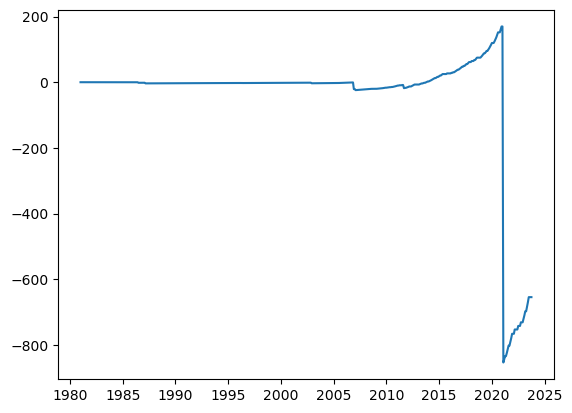

In [36]:
plt.plot(np.cumsum(df["profits"]))
plt.show()

In [ ]:
###your skills from MQE to help Mr.liu's ventures###

My knowledge in economics can provide more inspiration for trade strategy. Additionally, in terms of website design and promotion, integrating marketing with data science can make the website more widely known.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.